<a href="https://colab.research.google.com/github/StefanGarcziu/MachineLearning--UJK/blob/main/LAB_3_multi_armed_bandit_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]
EPSILON = 0.025

In [32]:
class Bandit_greedy:
  def __init__(self, q):
    self.q = q
    self.q_estimate = 0
    self.N = 0.

  def pull(self):
    return np.random.random() < self.q

  def update(self, r):
    self.N += 1.
    self.q_estimate = ((self.N - 1) * self.q_estimate + r) / self.N

mean estimate: 0.2008000000000002
mean estimate: 0
mean estimate: 0
total reward earned: 2008.0
overall win rate: 0.2008
num times selected each bandit: [10000.0, 0.0, 0.0]


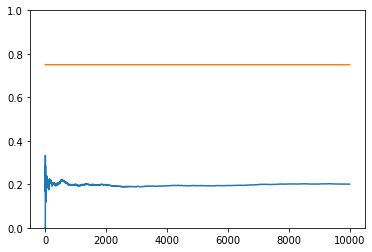

In [33]:
def experiment_greedy():
  bandits = [Bandit_greedy(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])
    r = bandits[j].pull()
    rewards[i] = r
    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)
    
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_greedy()

In [34]:
class Bandit_optimistic:
  def __init__(self, q):
    self.q = q
    self.q_estimate = 5
    self.N = 0.

  def pull(self):
    return np.random.random() < self.q

  def update(self, r):
    self.N += 1.
    self.q_estimate = ((self.N - 1) * self.q_estimate + r) / self.N

mean estimate: 0.0
mean estimate: 0.0
mean estimate: 0.7468493698739755
total reward earned: 7467.0
overall win rate: 0.7467
num times selected each bandit: [1.0, 1.0, 9998.0]


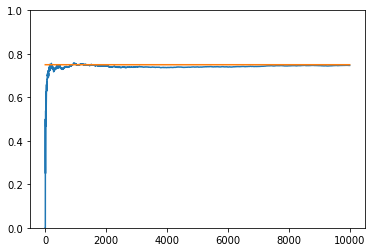

In [35]:
def experiment_optimistic():
  bandits = [Bandit_optimistic(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])
    r = bandits[j].pull()
    rewards[i] = r
    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)
    
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_optimistic()

In [36]:
class Bandit_q_optimistic:
  def __init__(self, q):
    self.q = q
    self.q_estimate = q
    self.N = 0.

  def pull(self):
    return np.random.random() < self.q

  def update(self, r):
    self.N += 1.
    self.q_estimate = ((self.N - 1) * self.q_estimate + r) / self.N

mean estimate: 0.2
mean estimate: 0.25
mean estimate: 0.7500000000000018
total reward earned: 7498.0
overall win rate: 0.7498
num times selected each bandit: [0.0, 4.0, 9996.0]


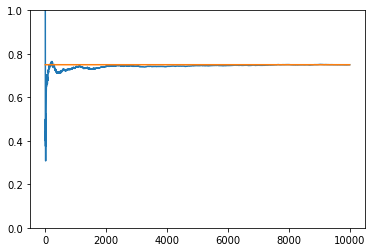

In [37]:
def experiment_q_optimistic():
  bandits = [Bandit_q_optimistic(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.q_estimate for b in bandits])
    r = bandits[j].pull()
    rewards[i] = r
    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)
    
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_q_optimistic()

optimal bandit: 2
mean estimate: 0.13414634146341461
mean estimate: 0.5478260869565218
mean estimate: 0.748444353769254
total reward earned: 7411.0
overall win rate: 0.7411
num times selected each bandit: [82.0, 115.0, 9803.0]
num times selected optimal bandit: 9803
num_times_explored: 254
num_times_exploited: 9746


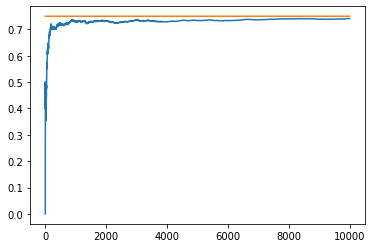

In [53]:
def experiment_epsilon():
  bandits = [Bandit_greedy(q) for q in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_bandit = np.argmax([b.q for b in bandits])

  print("optimal bandit:", optimal_bandit)



  for i in range(NUM_TRIALS):
    if np.random.random() < EPSILON:
      num_times_explored += 1
      j = np.random.randint(len(bandits))

    else:
      num_times_exploited += 1
      j = np.argmax([b.q_estimate for b in bandits])

    if j == optimal_bandit:
      num_optimal += 1

    r = bandits[j].pull()
    rewards[i] = r
    bandits[j].update(r)

  for b in bandits:
    print("mean estimate:", b.q_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])
  print("num times selected optimal bandit:", num_optimal)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  experiment_epsilon()